                          ~ BHARATH BOMMEESHWAR K D22012 | PRIYANKAN DATTA D22039 ~

                                        ~ PPP_TERM-2_HACKATHON ~

### <U>Objective

* To build a optimal Machine learning model to predict whether the bank customers will repay the loan or default.

### <U>Frame work
   01. Data acquistion
   02. Preliminary dataprocessing 
   03. Exploratory Data Analysis
   04. Data wrangling
   05. Hypothesis testing 
   06. Feature engineering
   07. Models Training and Validate
   08. Models Optimization and Validate  
   09. Training the whole dataset and Validate   
   10. Models testing      
   11. Results       

### <u> 1. DATA ACQUISITION

* <B> Importing Libraries

In [1]:
#datastructures and tools
import pandas as pd

#matrices and arrays
import numpy as np

#vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

#to hide harmless warnings
import warnings
warnings.filterwarnings('ignore')

#to work with time computation
import time

#Resampling 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

#scientific computation
from scipy import stats
import statsmodels.formula.api as sm

# scale the data
from sklearn.preprocessing import StandardScaler
# split the data
from sklearn.model_selection import train_test_split
# cross validation - grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#knn neighbour model
from sklearn.neighbors import KNeighborsClassifier
#decision tree model
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
#xgboosting
from xgboost import XGBClassifier
import xgboost as xgb 

#for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#measure accuracy of predictions
from sklearn import metrics
#to get complete classification report
from sklearn.metrics import classification_report

#to check accuracy 
from sklearn import metrics as mat

* <b> Importing dataset 

In [3]:
import os
os.getcwd()

'C:\\Users\\Al barak\\Downloads\\Term2_PPP\\part2'

In [ ]:
raw_data = pd.read_csv("Loans - Training Set.csv")

In [20]:
data1 = raw_data.copy()

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [22]:
d = pd.read_csv("Data Dictionary.csv")
pd.options.display.max_colwidth = 200
d

,Field Name,Description
0,Loan ID,A unique Identifier for the loan information.
1,Customer ID,A unique identifier for the customer. Customers may have more than one loan.
2,Loan Status,A categorical variable indicating if the loan was paid back or defaulted.
3,Current Loan Amount,"This is the loan amount that was either completely paid off, or the amount that was defaulted."
4,Term,A categorical variable indicating if it is a short term or long term loan.
5,Credit Score,A value between 0 and 800 indicating the riskiness of the borrowers credit history.
6,Years in current job,A categorical variable indicating how many years the customer has been in their current job.
7,Home Ownership,"Categorical variable indicating home ownership. Values are ""Rent"", ""Home Mortgage"",and ""Own"". If the value is OWN, then the customer is a home owner with no mortgage"
8,Annual Income,The customer's annual income
9,Purpose,A description of the purpose of the loan.


### <U> 2.PRELIMINARY DATA PROCESSING

* <B> Removing Duplicates

In [23]:
# removing duplicates using loan id because loan id can be only unique 
print("Original Dataset Count:",len(data1))

duplicates= data1.duplicated(["Loan ID"])
print("Duplicates count:",duplicates.sum())


data1 = data1.drop_duplicates(subset="Loan ID")
print("Observation count after removing duplicates:",len(data1))


Original Dataset Count: 111107
Duplicates count: 22197
Observation count after removing duplicates: 88910


In [24]:
#Find Missing percent in each columns
null_columns = []
for i in data1.columns:
    if data1[i].isna().sum() != 0:
        null_columns.append(i)
        
for i in null_columns:
    print("Missing Percent of "+ i + ":",round((data1[i].isna().sum()/len(data1[i])*100),4))  

Missing Percent of Credit Score: 23.9996
Missing Percent of Years in current job: 4.2931
Missing Percent of Annual Income: 23.9996
Missing Percent of Months since last delinquent: 54.5563
Missing Percent of Bankruptcies: 0.2159
Missing Percent of Tax Liens: 0.009


* <b> Data formatting

In [25]:
#removing punctuations
data1['Monthly Debt'] = (data1['Monthly Debt']).astype("str")

punctuation = ["$",",","-","/"]
for i in punctuation:
    data1['Monthly Debt'] = data1['Monthly Debt'].str.replace(i, '', regex=True)  

In [26]:
#Converting back to numeric after string character removal process
data1['Monthly Debt'] = pd.to_numeric(data1['Monthly Debt'])

In [27]:
data1['Monthly Debt'].dtypes

dtype('float64')

In [28]:
#Convert string column to numeric
data1['Maximum Open Credit'] = pd.to_numeric(data1['Maximum Open Credit'],errors='coerce')

In [29]:
#label encode categorical_ordinal
data1['Years in current job'] = data1['Years in current job'].replace({"< 1 year":0,"1 year":1,
                                                                       "2 years":2,"3 years":3,
                                                                       "4 years":4,"5 years":5,
                                                                       "6 years":6,"7 years":7,
                                                                       "8 years":8,"9 years":9,
                                                                       "10+ years":10})

In [30]:
#Label encoding target class
data1["Loan Status"] = data1["Loan Status"].replace({"Fully Paid":0,"Charged Off":1})

In [31]:
data1["Purpose"].value_counts()/data1["Purpose"].value_counts().sum()

Debt Consolidation      0.792341
Home Improvements       0.058554
other                   0.055303
Other                   0.032055
Business Loan           0.014936
Buy a Car               0.013452
Medical Bills           0.010741
Buy House               0.006287
Take a Trip             0.005106
major_purchase          0.003869
small_business          0.002789
moving                  0.001395
wedding                 0.001113
Educational Expenses    0.001035
vacation                0.000922
renewable_energy        0.000101
Name: Purpose, dtype: float64

In [ ]:
Buy House               0.006287
Take a Trip             0.005106
major_purchase          0.003869
small_business          0.002789
moving                  0.001395
wedding                 0.001113
Educational Expenses    0.001035
vacation                0.000922
renewable_energy        0.000101

In [15]:
purchase_table=pd.crosstab(data1["Loan Status"],columns=data1["Purpose"])
purchase_table

Purpose,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
Loan Status,,,,,,,,,,,,,,,,
Charged Off,533,159,234,19918,21,1296,311,667,123,99,49,1572,4,131,30,26
Fully Paid,795,400,962,50529,71,3910,644,2183,331,245,75,3345,5,117,52,73


In [321]:
data1.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,1,12232,Short Term,7280.0,0.0,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,1,25014,Long Term,7330.0,10.0,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961.0,0.0,0.0


In [322]:
#data1.to_csv("data1_punct_removed.csv",index=False)
#data1 = pd.read_csv("data1_punct_removed.csv")

### <U>3.EXPLORATORY DATA ANALYSIS

* <b> Descriptive statistics

In [32]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan Status,88910.0,2.831290e-01,4.505211e-01,0.0,0.00,0.000,1.0000,1.00
Current Loan Amount,88910.0,1.433878e+07,3.502996e+07,491.0,8283.00,14355.000,24485.0000,99999999.00
Credit Score,67572.0,1.199200e+03,1.680814e+03,585.0,714.00,733.000,744.0000,7510.00
Years in current job,85093.0,5.869543e+00,3.630084e+00,0.0,3.00,6.000,10.0000,10.00
Annual Income,67572.0,7.234575e+04,5.836101e+04,4033.0,44586.00,61494.000,86750.2500,8713547.00
Monthly Debt,88910.0,9.631021e+02,6.375241e+02,0.0,532.22,843.925,1250.5275,22939.12
Years of Credit History,88910.0,1.831531e+01,7.049175e+00,3.6,13.50,17.000,21.8000,70.50
Months since last delinquent,40404.0,3.508029e+01,2.200858e+01,0.0,16.00,32.000,51.0000,176.00
Number of Open Accounts,88910.0,1.111035e+01,4.978461e+00,0.0,8.00,10.000,14.0000,76.00
Number of Credit Problems,88910.0,1.604769e-01,4.737460e-01,0.0,0.00,0.000,0.0000,15.00


* <b> Data Visualization

In [33]:
#Frequency plot
def count_plot(var):
    plt.figure(figsize=(6,3))
    sns.countplot(data1[var],data = data1, palette='hls')
    plt.xticks(rotation = 90)
    plt.title("Frequency"+" vs "+var)
    return (plt.show())

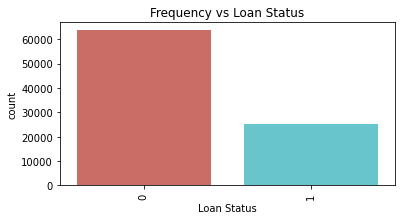

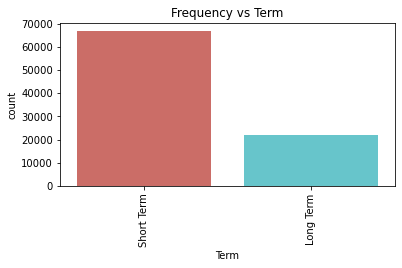

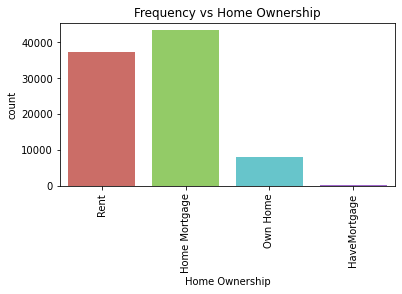

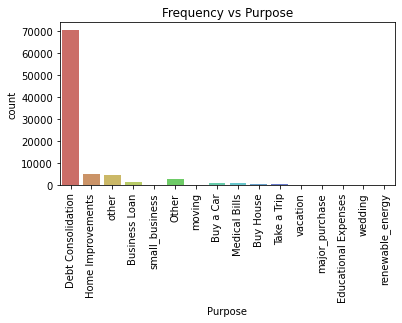

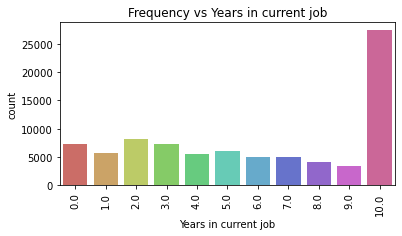

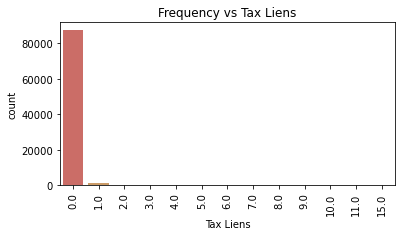

In [34]:
#Categorical data
cat = ['Loan Status','Term','Home Ownership','Purpose','Years in current job','Tax Liens']
for i in cat:
    count_plot(i)

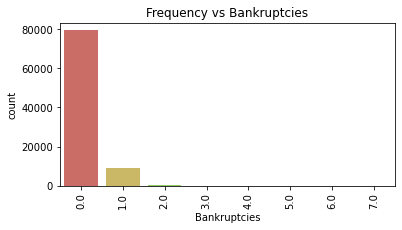

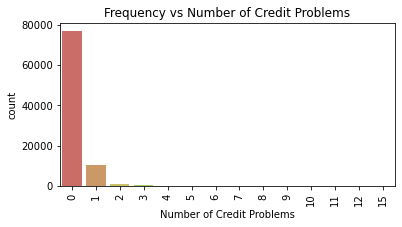

In [35]:
#Discrete numerical data
dis_num = ['Bankruptcies','Number of Credit Problems']
for i in dis_num:
    count_plot(i)

In [36]:
#Distribution plot

def distplot(var):
    plt.figure(figsize=(6,3))
    sns.distplot(data1[var])
    plt.xticks(rotation = 90)
    plt.title("Frequency Distribution "+  var)
    return (plt.show())

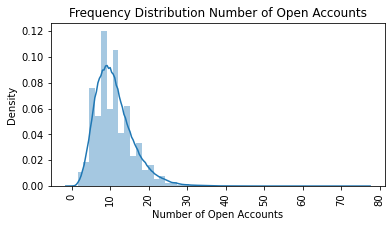

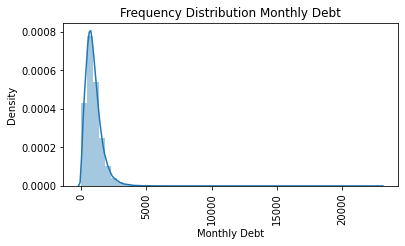

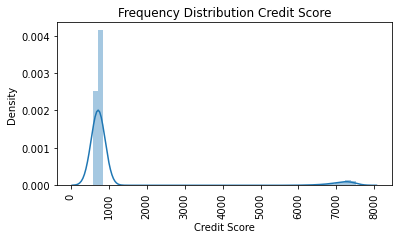

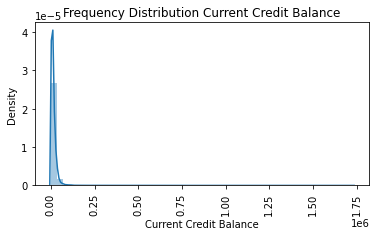

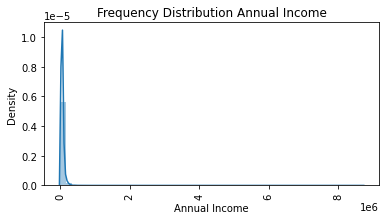

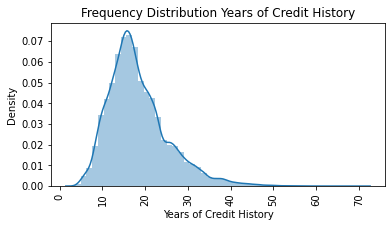

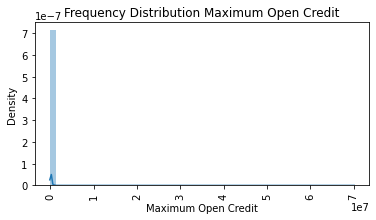

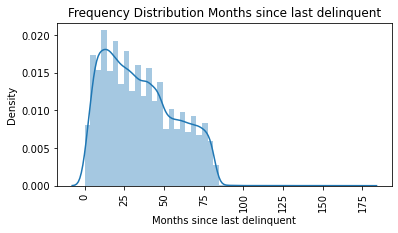

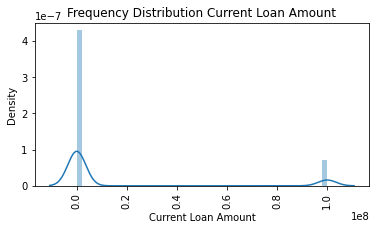

In [37]:
num = ['Number of Open Accounts','Monthly Debt','Credit Score','Current Credit Balance','Annual Income','Years of Credit History','Maximum Open Credit','Months since last delinquent','Current Loan Amount']

for i in num:
    distplot(i)

In [38]:
# Box plot 
def boxplot(var):
    plt.figure(figsize=(6,3))
    sns.boxplot(data1[var])
    plt.xticks(rotation = 90)
    plt.title("Frequency Distribution "+  var)
    return (plt.show())

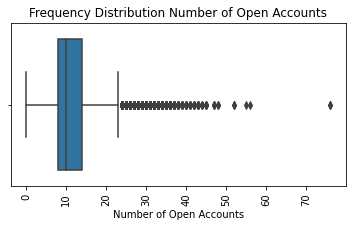

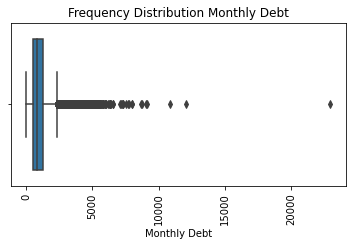

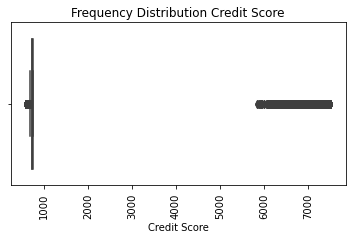

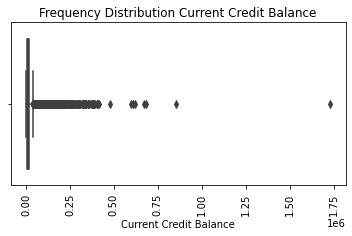

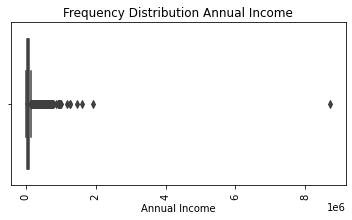

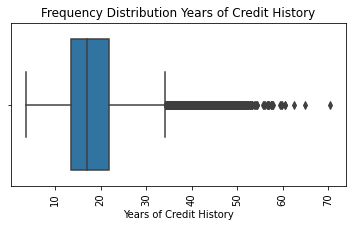

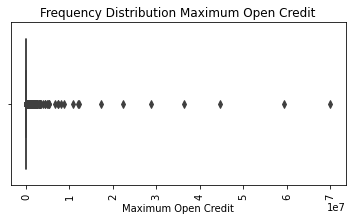

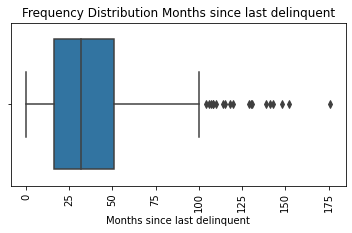

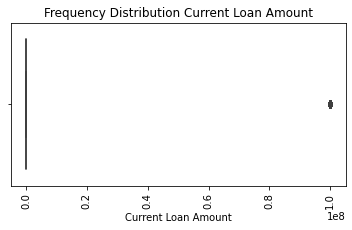

In [39]:
#numerical variable

for i in num:
    boxplot(i)

### <U>4.DATA WRANGLING

In [40]:
#Dropping Id column which has no explanatory power over target
data1.drop(["Loan ID","Customer ID"],axis=1,inplace=True)

In [41]:
#formatting the column with redundant data 
for i in range(len(data1['Home Ownership'])):
    if data1['Home Ownership'][i] == "HaveMortgage":
        data1['Home Ownership'][i] = "Home Mortgage" 

In [42]:
data1['Home Ownership'].value_counts()

Home Mortgage    43440
Rent             37395
Own Home          8075
Name: Home Ownership, dtype: int64

In [43]:
for i in range(len(data1['Purpose'])):
    if data1['Purpose'][i] == "other":
        data1['Purpose'][i] = "Other"

In [44]:
data1['Purpose'].value_counts()

Debt Consolidation      70447
Other                    7767
Home Improvements        5206
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

In [45]:
# Based on visualization of box plot , we will remove the extreme values from the following variables

#l = ['Annual Income','Maximum Open Credit','Current Loan Amount','Current Credit Balance',
#     'Monthly Debt','Number of Open Accounts','Years of Credit History','Months since last delinquent']

L = ['Current Loan Amount']
# Number of extreme values
for i in L:
    print(i,":",len(data1.loc[data1[i] == max(data1[i])]))


Current Loan Amount : 12738


In [46]:
max(data1["Current Loan Amount"])

99999999

In [47]:
# Finding and Treating Outliers which are at the extreme
for i in L:
    data1.loc[data1[i] == max(data1[i]),i] = np.nan

In [48]:
# binning
data1.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [49]:
#binning
data1['Bankruptcies'] = np.where(data1['Bankruptcies']> 0, 1, 0)

In [50]:
data1['Tax Liens'] = np.where(data1['Tax Liens']> 0, 1, 0)

In [51]:
data1['Number of Credit Problems'] = np.where(data1['Number of Credit Problems']> 0, 1, 0)

In [52]:
# Treating credit scores which are above 850 which ould be the max
for i in range(len(data1)):
    if  data1['Credit Score'][i] > 800:
        data1['Credit Score'][i] = (data1['Credit Score'][i])/10 


KeyboardInterrupt



In [ ]:
#box plot of Numerical Variables after removing the points which are extremely out of distribution 

for i in L:
    boxplot(i)

* The skewness has reduced much noticable for variables where outliers where present after removal of it.

In [ ]:
#summary after outlier treatment
data1.describe().T

In [ ]:
data1.columns

In [353]:
#data1.to_csv("bin_data1_hypotest_cleaned.csv",index=False)
#data1 =  pd.read_csv("bin_data1_hypotest_cleaned.csv")

### <u> 5.HYPOTHESIS TESTING
 Hypothesis testing to check statistical significance of variable over the target

* <b> Test of Independence
    
       Identifying the relationship between Binary target(dependent) and Categorical variables(independent)    

In [ ]:
cat = ['Term','Home Ownership','Purpose','Years in current job','Tax Liens','Bankruptcies','Number of Credit Problems']

In [ ]:
#Side by side barplot to analyse visually
for i in cat:    
    plt.figure(figsize=(5,5))
    pd.crosstab(data1[i], data1['Loan Status'],normalize=True).plot(kind='bar',rot=0)
    
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Percentage',fontsize=12)
    plt.title('Percentage' + ' vs '+i ,fontsize=14)
    plt.show()

In [ ]:
#Hypothesis test:

for i in cat:
    Data =  pd.crosstab(data1[i],columns = data1['Loan Status'])
    
    #H0 : There is no relation between two variables
    #H1 : There is a relation between two variables

    #Calculate Critical value
    r,c = Data.shape
    alpha = 0.05  #assumed
    x2c = stats.chi2.isf(alpha,df = ((r-1) * (c-1)))
    x2c

    #Chisquare statistic using contingency table
    cont = stats.chi2_contingency(Data)
    cont

    # From the contingency table
    # Chisquare statistic
    x2stat = cont[0]
    x2stat

    # p value test
    if stats.chi2.sf(x2stat,df = (r-1)*(c-1)) > alpha:
        print("p > alpha, There is NO SIGNIFICANT relationship between Loan status " + "& " + (i))
        print({"p_value" : cont[1],"alpha" :alpha})
        print("_"*120)
    else:
        print("p < alpha, There is SIGNIFICANT relationship between Loan status " + "& " + (i)) 
        print({"p_value" : cont[1],"alpha" :alpha})
        print("_"*120)

* <b> Two large Independent population test   
      To check the difference in mean between the target groups    

In [ ]:
#Numerical variable
num = ['Number of Open Accounts','Monthly Debt','Current Credit Balance','Annual Income','Years of Credit History','Maximum Open Credit','Months since last delinquent','Current Loan Amount']

In [ ]:
#Side by side Box plot to analyse visually
for i in num:
    sns.boxplot(data=data1,x='Loan Status',y=i,hue='Loan Status')
    plt.show()

In [ ]:
#Hypothesis testing

for i in num:

    # Step 1 : H0 : mu1 - mu2 = 0 (Variable is insignificant over the target variable)
    #          H1 : mu1 - mu2 != 0 (Variable is significant over the target variable)

    xbar1 = data1.groupby(["Loan Status"])[i].mean()[0]
    xbar2 = data1.groupby(["Loan Status"])[i].mean()[1]
    s1 = data1.groupby(["Loan Status"])[i].std()[0]
    s2 = data1.groupby(["Loan Status"])[i].std()[1]
    n1 = data1["Loan Status"].value_counts()[0]
    n2 = data1["Loan Status"].value_counts()[1]                          
    alpha = 0.05

    #Step 2 : Critical value

    ZcLeft = stats.norm.ppf(alpha/2)
    ZcRight = stats.norm.isf(alpha/2)

    #Step 3: Z-statistic 

    Z = ((xbar1-xbar2)-(0))/np.sqrt((s1**2/n1)+(s1**2/n2))

    #Step 4 Decision based on crtical value method

    if Z > ZcLeft and Z < ZcRight :
         print( i + " is INSIGNIFICANT over the target variable")
         print("_"*200)   
           
    else:
         print( i + " is SIGNIFICANT over the target variable")
         print("_"*100)   

* From the hypothesis test we could see the variable bankruptcy is not significant but still we not drop because it may be significant in combination with other variable.

### <u> 6.FEATURE ENGINEERING

In [ ]:
#Find Missing percent in each columns after removing the outliers
null_columns = []
for i in data1.columns:
    if data1[i].isna().sum() != 0:
        null_columns.append(i)
        
for i in null_columns:
    print("Missing Percent of "+ i + ":",round((data1[i].isna().sum()/len(data1[i])*100),4))

In [ ]:
data1.columns

* <B> Encoding Nominal variables

In [355]:
# Create dummies of Nominal variable
data1 = pd.get_dummies(data1,columns=['Term','Home Ownership','Purpose','Bankruptcies','Tax Liens','Number of Credit Problems'],drop_first=True)

In [356]:
data1.columns

Index(['Loan Status', 'Current Loan Amount', 'Credit Score',
       'Years in current job', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Term_Short Term', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Bankruptcies_1', 'Tax Liens_1',
       'Number of Credit Problems_1'],
      dtype='object')

* <b> Standardizing Numerical variables

In [357]:
# Scaling all the necessary variables before feeding in Knn

# Using standard scalar
#from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler


continuous = ["Current Loan Amount","Credit Score","Annual Income","Number of Open Accounts","Current Credit Balance","Years in current job","Monthly Debt","Months since last delinquent","Years of Credit History","Maximum Open Credit"]
#scaler = StandardScaler()
scaler = MinMaxScaler()
data1[continuous]= scaler.fit_transform(data1[continuous])

In [361]:
data1.head(2)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,...,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Bankruptcies_1,Tax Liens_1,Number of Credit Problems_1
0,1,0.331817,0.861446,0.0,0.004892,0.033889,0.215247,0.056818,0.157895,0.003908,...,0,0,0,0,0,0,0,0,0,0
1,1,0.693053,0.891566,1.0,0.008848,0.038889,0.345291,NaN,0.184211,0.020634,...,0,0,0,0,0,0,0,0,0,0


In [362]:
#data1.to_csv("binned_minmaxscaled_data1_hypotest.csv",index=False)

### <u>7.MODEL TRAINING AND EVALUATING

##### TRIAL 1:  (BASELINE MODEL)

* <b> Missing values are imputed by KNN imputer
* <B> Standardized data    

In [413]:
# Imputing using knn imputer  

from sklearn.impute import KNNImputer  
import time  

start = time.time()  

imputer = KNNImputer(n_neighbors=5)  
knn_data = imputer.fit_transform(data1)  
  
end  = time.time()  
  
print("timetaken:",round((1000*(end-start)/60000),2),"min")  

timetaken: 12.66 min


In [417]:
#Numerical variables for knn- imputation
col = data1.columns
data1 = pd.DataFrame(knn_data,columns=col)

In [418]:
data1.to_csv("knn_imputed_scaled_final.csv",index=False)
data1 =pd.read_csv("knn_imputed_scaled_final.csv")

In [419]:
#splitting dependent and independent variables 
X = data1.drop('Loan Status',axis=1)
y = data1['Loan Status']

In [420]:
#Splitting the data TRAIN TEST
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

* <b> Model With Default Parameters

In [421]:
#models with default parameter
rf1 = RandomForestClassifier() #random forest
ab1 = AdaBoostClassifier() #adaboost
gb1 = GradientBoostingClassifier() #gradientboost
hgb1 = HistGradientBoostingClassifier() #histgradient boosting
xgb1 = XGBClassifier()#xgboost classifier

* <b> Validating the model on Test data(Validation)

In [422]:
# Default model performance on test data
L = [rf1,ab1,gb1,hgb1,xgb1]
acc1 = []
f1 = []
auroc1 = []
for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = mat.accuracy_score(y_test,pred)
    acc1.append(score)
    f_1 = mat.f1_score(y_test,pred)
    f1.append(f_1)
    auroc = mat.roc_auc_score(y_test,pred)
    auroc1.append(auroc)
df1 = pd.DataFrame({"accuracy":acc1,"f1_score":f1,"auroc":auroc1},index=["DT","RF","AB","GB","HGB"])    
df1

,accuracy,f1_score,auroc
DT,0.732005,0.311250,0.575253
RF,0.724762,0.285447,0.564240
AB,0.731915,0.305721,0.573556
GB,0.732275,0.319185,0.577797
HGB,0.729125,0.349292,0.586225


#### <i> TRIAL 2:

* <b> Descaled Standardized variables

In [423]:
data2 = pd.read_csv("knn_imputed_scaled_final.csv")

In [424]:
#Descaling by inverse transform
descaled = scaler.inverse_transform(data1[continuous])
descaled_frame = pd.DataFrame(descaled,columns=continuous)
descaled_frame

,Current Loan Amount,Credit Score,Annual Income,Tax Liens,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Years in current job,Monthly Debt,Months since last delinquent,Years of Credit History,Maximum Open Credit
0,12232.0,728.0,46643.0,2.081668e-17,12.0,2.775558e-17,6762.0,0.0,777.39,10.0,18.0,7946.0
1,25014.0,733.0,81099.0,2.081668e-17,14.0,2.775558e-17,35706.0,10.0,892.09,43.0,26.7,77961.0
2,16117.0,724.0,60438.0,2.081668e-17,11.0,1.000000e+00,11275.0,9.0,1244.02,32.0,16.7,14815.0
3,11716.0,740.0,34171.0,2.081668e-17,21.0,2.775558e-17,7009.0,3.0,990.94,26.8,10.0,43533.0
4,9789.0,686.0,47003.0,2.081668e-17,13.0,1.000000e+00,16913.0,10.0,503.71,25.0,16.7,19553.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88905,10136.0,728.0,35476.0,2.081668e-17,14.0,2.775558e-17,15914.0,10.0,567.62,14.0,21.2,28265.0
88906,29610.0,710.0,123375.0,2.081668e-17,11.0,2.775558e-17,17727.0,10.0,2508.63,16.0,15.0,32766.0
88907,24394.0,746.0,71148.0,2.081668e-17,8.0,2.775558e-17,44728.0,9.4,818.20,9.0,36.4,53374.0
88908,5030.0,722.0,25424.0,2.081668e-17,12.0,2.775558e-17,6374.0,7.6,360.17,7.0,19.0,18422.0


In [425]:
unscaled_var = data1.drop(continuous,axis=1)

In [426]:
# Merging descaled and other unscaled variables
descaled_frame.reset_index(drop=True, inplace=True)
unscaled_var.reset_index(drop=True, inplace=True)
data3 = pd.concat([descaled_frame,unscaled_var],axis=1)
data3.head(2)

,Current Loan Amount,Credit Score,Annual Income,Tax Liens,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Years in current job,Monthly Debt,Months since last delinquent,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,12232.0,728.0,46643.0,2.081668e-17,12.0,2.775558e-17,6762.0,0.0,777.39,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25014.0,733.0,81099.0,2.081668e-17,14.0,2.775558e-17,35706.0,10.0,892.09,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [427]:
data3.shape

(88910, 31)

In [428]:
data3.to_csv("knn_imputed_descaled_final.csv",index=False)
data3 = pd.read_csv("knn_imputed_descaled_final.csv")

In [429]:
# descaled dataset 
X = data3.drop('Loan Status',axis=1)
y = data3['Loan Status']

In [430]:
#Splitting the data Train/Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

* <b> Model With Default Parameters

In [431]:
#models with default parameter
rf2 = RandomForestClassifier() #random forest
ab2 = AdaBoostClassifier() #adaboost
gb2 = GradientBoostingClassifier() #gradientboost
hgb2 = HistGradientBoostingClassifier() #histgradient boosting
xgb2 = XGBClassifier() #xgboosting

* <b> Validating the model on test data

In [432]:
# default model performance on test data
L = [rf2,ab2,gb2,hgb2,xgb2]
acc2 = []
f2 = []
auroc2 = []
for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = mat.accuracy_score(y_test,pred)
    acc2.append(score)
    f_1 = mat.f1_score(y_test,pred)
    f2.append(f_1)
    auroc = mat.roc_auc_score(y_test,pred)
    auroc2.append(auroc)
df2 = pd.DataFrame({"accuracy":acc2,"f1_score":f2,"auroc":auroc2},index=["RF","AB","GB","HGB","XGB"])    
df2

,accuracy,f1_score,auroc
RF,0.735424,0.315765,0.578167
AB,0.724762,0.285447,0.564240
GB,0.731870,0.305523,0.573476
HGB,0.733264,0.323096,0.579449
XGB,0.729215,0.349368,0.586288


#### <I> TRIAL 3:

* <b> Standardized numerical variables
* <B> Balancing the target class using Smote algorithm and Train the model

In [433]:
X = data2.drop('Loan Status',axis=1)
y = data2['Loan Status']

In [434]:
data2.head(2)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1.0,-0.206647,0.233271,-1.616926,-0.533165,-0.292878,-0.044661,-1.139989,0.179335,-0.338742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.345345,0.415570,1.137847,0.185147,-0.111749,1.189907,0.360188,0.581834,-0.338742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [435]:
#Splitting the data TRAIN TEST
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

Class=1, n=47802 (50.000%)
Class=0, n=47802 (50.000%)


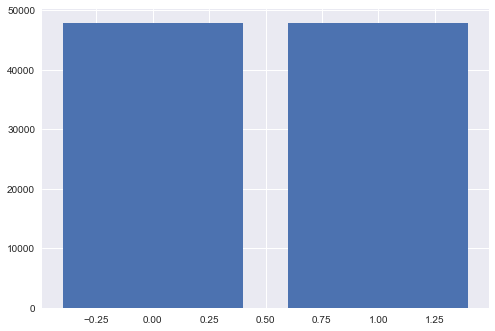

In [436]:
# Balance the train data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

* <b> Model With Default Parameters

In [437]:
#models with default parameter
rf3 = RandomForestClassifier() #random forest
ab3 = AdaBoostClassifier() #adaboost
gb3 = GradientBoostingClassifier() #gradientboost
hgb3 = HistGradientBoostingClassifier() #histgradientboost
xgb3 = XGBClassifier() #xgboost

* <b> Validating the model on test data

In [438]:
# default model performance on test data
L = [rf3,ab3,gb3,hgb3,xgb3]
acc3 = []
f3 = []
auroc3 = []
for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = mat.accuracy_score(y_test,pred)
    acc3.append(score)
    f_1 = mat.f1_score(y_test,pred)
    f3.append(f_1)
    auroc = mat.roc_auc_score(y_test,pred)
    auroc3.append(auroc)
df3 = pd.DataFrame({"accuracy":acc3,"f1_score":f3,"auroc":auroc3},index=["RF","AB","GB","HGB","XGB"])    
df3

,accuracy,f1_score,auroc
RF,0.705642,0.463908,0.628258
AB,0.641398,0.503766,0.641864
GB,0.679818,0.495427,0.642122
HGB,0.715359,0.458537,0.627728
XGB,0.717923,0.415112,0.607691


#### <I> TRIAL 4:

* <b> Imputing the missing with Conditional Mean/Median/Mode
* <b> Standardized numerical Variables    

In [365]:
# Importing the previously cleaned data which was used for hypothesis testing
data4 = pd.read_csv("bin_data1_hypotest_cleaned.csv")

In [366]:
data4.isna().sum()

Loan Status                         0
Current Loan Amount             12738
Term                                0
Credit Score                    21338
Years in current job             3817
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                        0
Tax Liens                           0
dtype: int64

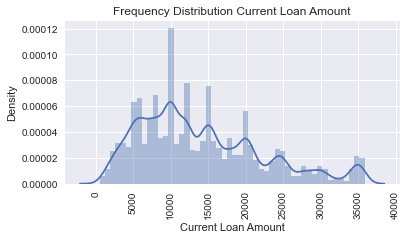

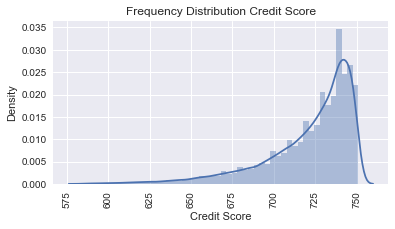

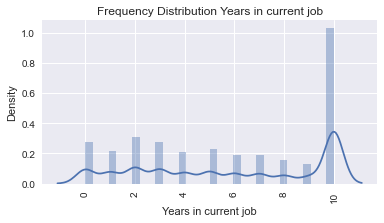

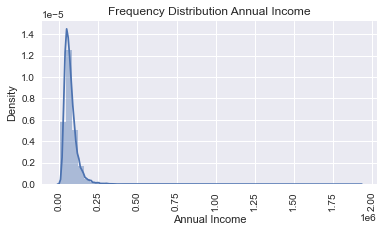

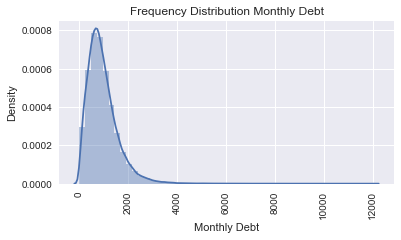

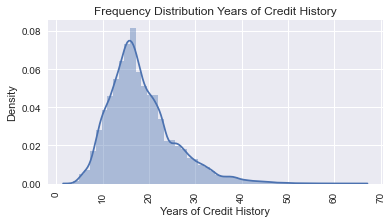

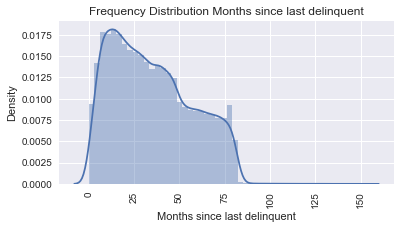

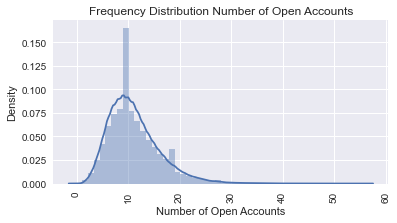

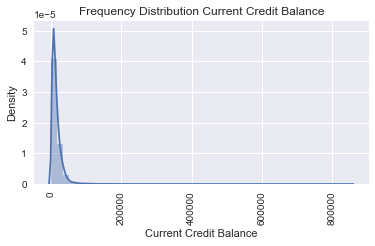

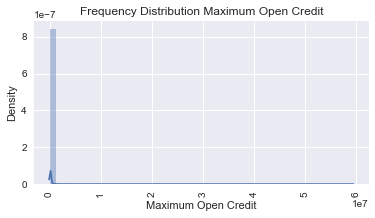

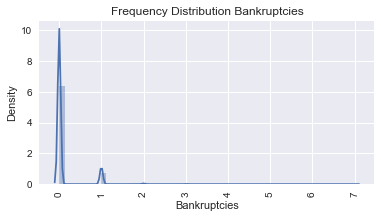

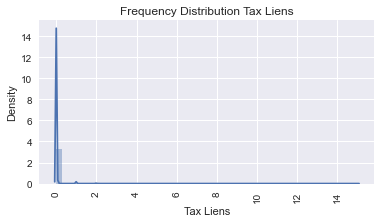

In [441]:
#dist plot of Numerical Variables to check distribution

num = ['Current Loan Amount','Credit Score','Years in current job','Annual Income','Monthly Debt','Years of Credit History',
       'Months since last delinquent','Number of Open Accounts','Current Credit Balance','Maximum Open Credit','Bankruptcies',
       'Tax Liens']

def distplot(var):
    plt.figure(figsize=(6,3))
    sns.distplot(data4[var])
    plt.xticks(rotation = 90)
    plt.title("Frequency Distribution "+  var)
    return (plt.show())


for i in num:
    distplot(i)

In [367]:
# fill missing with condition median because of skewed distribution and suspection of outliers

start = time.time()

l = ['Current Loan Amount','Credit Score','Years in current job','Annual Income','Months since last delinquent','Maximum Open Credit']

loans0=data4[data4['Loan Status']==0]
loans1=data4[data4['Loan Status']==1]

for i in l:
    
    loans0[i].fillna(value=loans0[i].median(),inplace=True)
    loans1[i].fillna(value=loans1[i].median(),inplace=True)
    
end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")    


data5=pd.concat([loans0,loans1],axis=0)
data5.sort_index(inplace=True)  

timetaken: 0.005197020371754965 min


In [368]:
# Create dummies of Nominal variable
data5 = pd.get_dummies(data5,columns=['Term','Home Ownership','Purpose','Bankruptcies','Tax Liens','Number of Credit Problems'],drop_first=True)

In [ ]:
Buy House               0.006287
Take a Trip             0.005106
major_purchase          0.003869
small_business          0.002789
moving                  0.001395
wedding                 0.001113
Educational Expenses    0.001035
vacation                0.000922
renewable_energy        0.000101

In [369]:
data5.head(25)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,...,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Bankruptcies_1,Tax Liens_1,Number of Credit Problems_1
0,1,12232.0,728.0,0.0,46643.0,777.39,18.0,10.0,12,6762,...,0,0,0,0,0,0,0,0,0,0
1,1,25014.0,733.0,10.0,81099.0,892.09,26.7,31.0,14,35706,...,0,0,0,0,0,0,0,0,0,0


In [370]:
data5.to_csv("bin_conditional_imputed_unscaled_final.csv",index=False)
data5 = pd.read_csv("bin_conditional_imputed_unscaled_final.csv")

In [371]:
data5.isna().sum()

Loan Status                     0
Current Loan Amount             0
Credit Score                    0
Years in current job            0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Current Credit Balance          0
Maximum Open Credit             0
Term_Short Term                 0
Home Ownership_Own Home         0
Home Ownership_Rent             0
Purpose_Buy House               0
Purpose_Buy a Car               0
Purpose_Debt Consolidation      0
Purpose_Educational Expenses    0
Purpose_Home Improvements       0
Purpose_Medical Bills           0
Purpose_Other                   0
Purpose_Take a Trip             0
Purpose_major_purchase          0
Purpose_moving                  0
Purpose_renewable_energy        0
Purpose_small_business          0
Purpose_vacation                0
Purpose_wedding                 0
Bankruptcies_1                  0
Tax Liens_1   

In [372]:
# Using standard scalar
from sklearn.preprocessing import MinMaxScaler


continuous = ["Current Loan Amount","Credit Score","Annual Income","Number of Open Accounts","Current Credit Balance","Years in current job","Monthly Debt","Months since last delinquent","Years of Credit History","Maximum Open Credit"]
#scaler = StandardScaler()
scaler = MinMaxScaler()
data5[continuous]= scaler.fit_transform(data5[continuous])

In [373]:
data5.to_csv("bin_conditional_imputed_mmscaled_final.csv",index=False)
data6 = pd.read_csv("bin_conditional_imputed_mmscaled_final.csv")

In [374]:
X = data6.drop('Loan Status',axis=1)
y = data6['Loan Status']

In [375]:
#Splitting the data TRAIN TEST
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

* <b> Model With Default Parameters

In [376]:
#models
rf4 = RandomForestClassifier() #random forest
ab4 = AdaBoostClassifier() #adaboost
gb4 = GradientBoostingClassifier() #gradientboost
hgb4 = HistGradientBoostingClassifier() #histboost
xgb4 = XGBClassifier() #xgboost

* <b> Validating the model on test data

In [377]:
# default model performance on test data(validation data)
L = [rf4,ab4,gb4,hgb4,xgb4]
acc4 = []
f4 = []
auroc4 = []
for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = mat.accuracy_score(y_test,pred)
    acc4.append(score)
    f_2 = mat.f1_score(y_test,pred)
    f4.append(f_2)
    auroc = mat.roc_auc_score(y_test,pred)
    auroc4.append(auroc)
df4 = pd.DataFrame({"accuracy":acc4,"f1_score":f4,"auroc":auroc4},index=["RF","AB","GB","HGB","XGB"])    
df4

,accuracy,f1_score,auroc
RF,0.901611,0.809179,0.851764
AB,0.895402,0.806169,0.856953
GB,0.905075,0.819781,0.861968
HGB,0.905030,0.818845,0.860591
XGB,0.905030,0.821721,0.865110


#### <I> TRIAL 5:

* <b> Balanced training data    

Class=1, n=47802 (50.000%)
Class=0, n=47802 (50.000%)


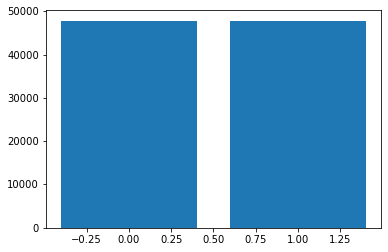

In [378]:
# Balance the data
oversample = SMOTE()
X_train1, y_train1 = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train1)
for k,v in counter.items():
    per = v / len(y_train1) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [379]:
X_train.shape 

(66682, 30)

In [380]:
X_train1.shape #balanced train

(95604, 30)

* <b> Model With Default Parameters

In [381]:
#models
rf5 = RandomForestClassifier(random_state=42) #random forest
ab5 = AdaBoostClassifier(random_state=42) #adaboost
gb5 = GradientBoostingClassifier(random_state=42) #gradientboost
hgb5 = HistGradientBoostingClassifier(random_state=42)#histgradient boost
xgb5 = XGBClassifier(random_state=42) #xgb boost

In [382]:
# default model performance on test data
L = [rf5,ab5,gb5,hgb5,xgb5]
acc5 = []
f5 = []
auroc5 = []
for i in L:
    model = i.fit(X_train1,y_train1)
    pred = model.predict(X_test)
    score = mat.accuracy_score(y_test,pred)
    acc5.append(score)
    f_2 = mat.f1_score(y_test,pred)
    f5.append(f_2)
    auroc = mat.roc_auc_score(y_test,pred)
    auroc5.append(auroc)
df5 = pd.DataFrame({"accuracy":acc5,"f1_score":f5,"auroc":auroc5},index=["RF","AB","GB","HGB","XGB"])    
df5

,accuracy,f1_score,auroc
RF,0.888249,0.811989,0.877396
AB,0.877002,0.803564,0.880513
GB,0.880691,0.807603,0.881836
HGB,0.896482,0.821835,0.880398
XGB,0.899541,0.819088,0.870416


### <u>8.MODEL OPTIMIZATION AND EVALUATING

* Data used - Conditional imputated missing values,Standardized and Balanced data

#### <font color= BLUE>1.RANDOM FOREST  

#### Choosing best parameters

In [43]:
#try1 (only class weight as hyperparameter)

start = time.time()

clf = RandomForestClassifier()
params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]}
gs = RandomizedSearchCV(estimator=clf, param_distributions=params,n_iter=50,cv=5)
gs.fit(X_train, y_train) #try using balanced data

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

gs.best_params_

timetaken: 10.903055493036906 min


{'class_weight': {0: 3.0, 1: 1}}

#### Model validation

In [383]:
#Fitting tree with best parameters
gs = RandomForestClassifier(class_weight = {0: 3.0, 1: 1})
gs.fit(X_train1,y_train1)  #balanced data

RandomForestClassifier(class_weight={0: 3.0, 1: 1})

In [384]:
#Prediction on validation data
y_pred = gs.predict(X_test)

Accuracy : 0.8870793593665647
F1 Score: 0.8127145202208625
Auroc: 0.8805222691042203
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     15935
           1       0.77      0.87      0.81      6293

    accuracy                           0.89     22228
   macro avg       0.86      0.88      0.87     22228
weighted avg       0.89      0.89      0.89     22228



<AxesSubplot:>

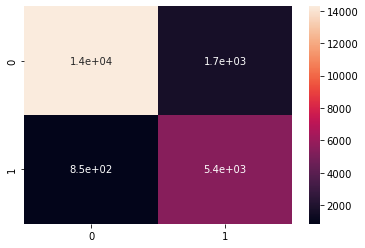

In [385]:
#accuracy score
rf2_acc = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",rf2_acc)

f1_1 = mat.f1_score(y_test,y_pred)
print("F1 Score:",f1_1)

auroc1 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",auroc1)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
#try2: using all hyperparameters

#Finding best parameter for RF model
rf = RandomForestClassifier()
rf.fit(X_train,y_train) #try using balanced data

start = time.time()

# Hyper parameters range intialization for tuning 
param_grid = {"class_weight":[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)],
             "bootstrap": [True, False],
            "max_depth" : [8,12,16,18],
            "max_leaf_nodes": [30,40,50,60],
            "max_features":["log2","sqrt"],
            "n_estimators":[100,150,200],
            "min_samples_leaf":[3,4,5,6,7],
            "min_samples_split": [2,3,4,5,6],
            "criterion" :["gini", "entropy"]
             }

#Randomsearch 
CV_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,n_iter=10,cv=5,n_jobs=-1,verbose=1)
CV_rf.fit(X_train, y_train) #try using balanced data

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

#Best parameters
CV_rf.best_params_

#### Model validation

In [400]:
#Fitting tree with best parameters
rf2 = RandomForestClassifier(class_weight = {0: 1.0, 1: 1},criterion='entropy',max_depth = 12,max_features = 'sqrt',max_leaf_nodes = 50,
                             min_samples_leaf = 7,min_samples_split = 4,n_estimators = 200,bootstrap=False,random_state=42)
rf2.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=False, class_weight={0: 1.0, 1: 1},
                       criterion='entropy', max_depth=12, max_features='sqrt',
                       max_leaf_nodes=50, min_samples_leaf=7,
                       min_samples_split=4, n_estimators=200, random_state=42)

In [401]:
#Prediction on validation data
y_pred = rf2.predict(X_test)

Accuracy : 0.8688590966348749
F1 Score: 0.794094794094794
Auroc: 0.8762276740917374
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     15935
           1       0.71      0.89      0.79      6293

    accuracy                           0.87     22228
   macro avg       0.83      0.88      0.85     22228
weighted avg       0.89      0.87      0.87     22228



<AxesSubplot:>

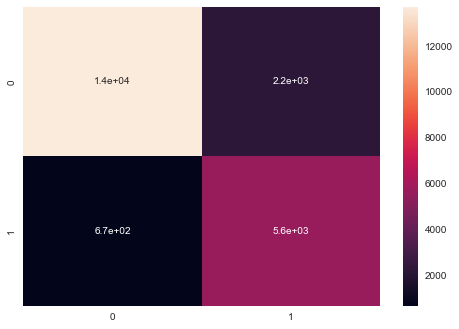

In [402]:
rf2_acc1 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",rf2_acc1)

f1_1 = mat.f1_score(y_test,y_pred)
print("F1 Score:",f1_1)

auroc1 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",auroc1)
fpr1, tpr1, _ = mat.roc_curve(y_test,  y_pred)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

#### <font color= BLUE> 2.ADAPTIVE BOOSTING

#### Choosing best parameters

In [57]:
#Finding best parameter for Adaboost model

ab = AdaBoostClassifier()
ab.fit(X_train,y_train) #try using balanced data

start = time.time()

# Hyper parameters range intialization for tuning  (base_estimator will be decision tree)
param_grid = {
    'n_estimators': range(120, 170, 5),
     }

#Gridsearch on different combination of parameter
CV_ab = RandomizedSearchCV(estimator=ab, param_distributions=param_grid,n_iter=50,cv= 5)
CV_ab.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

#Best parameters
CV_ab.best_params_

timetaken: 20.02 min


{'n_estimators': 165}

#### Model validation

In [386]:
ab2 = AdaBoostClassifier(n_estimators = 165,random_state=42)
ab2.fit(X_train1,y_train1)

AdaBoostClassifier(n_estimators=165, random_state=42)

In [387]:
#Prediction on validation data
y_pred = ab2.predict(X_test)

Accuracy : 0.8810959150620838
F1 Score: 0.809211001227171
Auroc: 0.8839931319587445
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     15935
           1       0.74      0.89      0.81      6293

    accuracy                           0.88     22228
   macro avg       0.85      0.88      0.86     22228
weighted avg       0.89      0.88      0.88     22228



<AxesSubplot:>

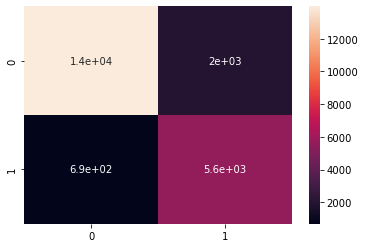

In [388]:
#accuracy score
ab2_acc1 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",ab2_acc1)

f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",f1_2)

auroc2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",auroc2)
fpr2, tpr2, _ = mat.roc_curve(y_test,  y_pred)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

#### <font color= BLUE> 3.GRADIENT BOOSTING

#### Choosing best parameters

In [104]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[8,10,12,14],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,600,100)
       }

#Initializing gradient boosting object
gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
gb_cv = RandomizedSearchCV(gb, param_distributions=grid,n_iter=10,cv = 5) #50fols -320min 
gb_cv.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",gb_cv.best_params_)

timetaken: 320.82 min
Best Parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.05}


#### Model validation

In [389]:
#fitting the model with best parameter
start = time.time()

gb2 = GradientBoostingClassifier(learning_rate = 0.05, max_depth =12, n_estimators = 500,random_state=42)
gb2.fit(X_train1,y_train1)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 14.51 min


In [390]:
#Prediction on validation data
y_pred = gb2.predict(X_test)

Accuracy : 0.8988662947633616
F1 Score: 0.8174139051332033
Auroc: 0.8688397480807414
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     15935
           1       0.84      0.80      0.82      6293

    accuracy                           0.90     22228
   macro avg       0.88      0.87      0.87     22228
weighted avg       0.90      0.90      0.90     22228



<AxesSubplot:>

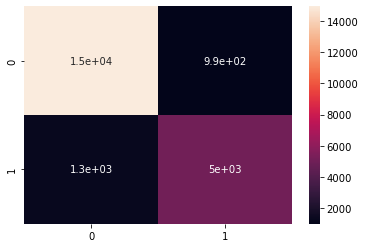

In [391]:
#accuracy score
gb2_acc1 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",gb2_acc1)

f1_3 = mat.f1_score(y_test,y_pred)
print("F1 Score:",f1_3)

auroc3 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",auroc3)
fpr3, tpr3, _ = mat.roc_curve(y_test,  y_pred)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

#### <font color= BLUE> 4.HIST GRADIENT BOOSTING

#### Choosing best parameters

In [107]:
# Finding the best parameter
start = time.time()

parameters_hgb = [{'max_iter': [100,150,200],
                'learning_rate': [0.01,0.1],
                'max_depth' : [12, 15, 18],
                'l2_regularization': [1.5],
                'scoring': ['f1_micro']}]

#Initializing hist gradient boosting object
hgb = HistGradientBoostingClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
hgb_cv = RandomizedSearchCV(hgb, param_distributions=parameters_hgb,n_iter=10,cv = 5)
hgb_cv.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",hgb_cv.best_params_)

timetaken: 6.23 min
Best Parameters: {'scoring': 'f1_micro', 'max_iter': 200, 'max_depth': 12, 'learning_rate': 0.1, 'l2_regularization': 1.5}


#### Model validation

In [392]:
#fitting the model with best parameter
start = time.time()

hgb2 = HistGradientBoostingClassifier(max_iter=200,learning_rate=0.1,max_depth = 12,l2_regularization=1.5,scoring='f1_micro',random_state=42)
hgb2.fit(X_train1,y_train1)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process


timetaken: 0.2 min


In [393]:
#Prediction on validation data
y_pred = hgb2.predict(X_test)

Accuracy : 0.8965269030052186
F1 Score: 0.822831613002619
Auroc: 0.8820635695695074
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15935
           1       0.80      0.85      0.82      6293

    accuracy                           0.90     22228
   macro avg       0.87      0.88      0.87     22228
weighted avg       0.90      0.90      0.90     22228



<AxesSubplot:>

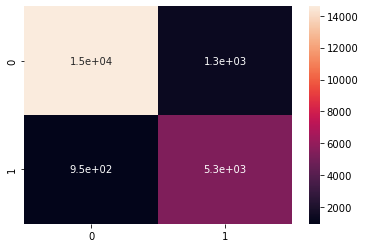

In [394]:
#accuracy score
hgb2_acc1 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",hgb2_acc1)

f1_4 = mat.f1_score(y_test,y_pred)
print("F1 Score:",f1_4)

auroc4 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",auroc4)
fpr4, tpr4, _ = mat.roc_curve(y_test,  y_pred)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)


#### <font color= BLUE> 5.XG BOOSTING

#### Choosing best parameters

In [32]:
# Finding the best parameter
start = time.time()

grid = {'n_estimators':np.arange(100,600,100),
        'subsample':np.arange(.05,1,.05),
        'max_depth':np.arange(3,20,1),
        'colsample_bytree':np.arange(.1,1.05,.05)}

#Initializing xtreme gradient boosting object
xgb = XGBClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
xgb_cv = RandomizedSearchCV(xgb, param_distributions=grid,n_iter=50,cv = 5)
xgb_cv.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",xgb_cv.best_params_)

timetaken: 176.27 min
Best Parameters: {'subsample': 0.9000000000000001, 'n_estimators': 500, 'max_depth': 19, 'colsample_bytree': 0.8000000000000002}


#### Model validation

In [395]:
#fitting the model with best parameter
xgb2 = XGBClassifier(subsample= 0.90, n_estimators= 500, max_depth= 19, colsample_bytree= 0.80,random_state=42)
xgb2.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [396]:
#Prediction on validation data
y_pred = xgb2.predict(X_test)

Accuracy : 0.8951322656109412
F1 Score: 0.812484916740407
Auroc: 0.8671007840079705
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     15935
           1       0.82      0.80      0.81      6293

    accuracy                           0.90     22228
   macro avg       0.87      0.87      0.87     22228
weighted avg       0.89      0.90      0.89     22228



<AxesSubplot:>

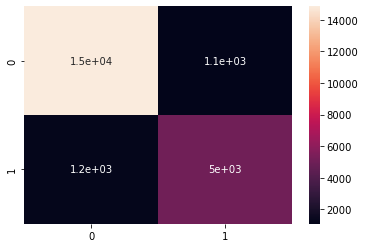

In [397]:
#accuracy score
xgb2_acc1 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",xgb2_acc1)

f1_5 = mat.f1_score(y_test,y_pred)
print("F1 Score:",f1_5)

auroc5 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",auroc5)
fpr5, tpr5, _ = mat.roc_curve(y_test,y_pred)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)


* <u><b> <font color= BLUE>ROC Plot comparison (models with its best parameters)

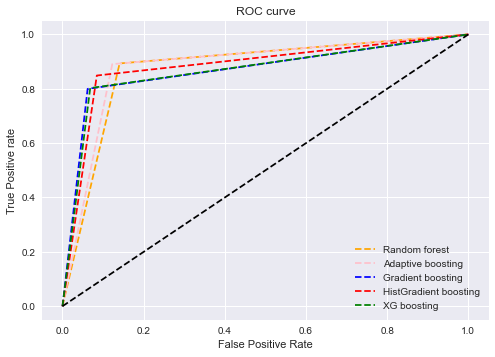

In [403]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random forest')
plt.plot(fpr2, tpr2, linestyle='--',color='pink', label='Adaptive boosting')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Gradient boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='HistGradient boosting')
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='XG boosting')


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = mat.roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()


In [404]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')


df1 = pd.DataFrame({"Accuracy":acc5,"F1_Score":f5,"Auroc":auroc5},index=["RF","AB","GB","HGB","XGB"])

df2 = pd.DataFrame({"Accuracy":[rf2_acc1,ab2_acc1,gb2_acc1,hgb2_acc1,xgb2_acc1],
                    "F1_Score":[f1_1,f1_2,f1_3,f1_4,f1_5],
                    "Auroc":[auroc1,auroc2,auroc3,auroc4,auroc5]},
                   index=["RF","AB","GB","HGB","XGB"])


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Model Performance on validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Accuracy,F1_Score,Auroc
RF,0.888249,0.811989,0.867101
AB,0.877002,0.803564,0.867101
GB,0.880691,0.807603,0.867101
HGB,0.896482,0.821835,0.867101
XGB,0.899541,0.819088,0.867101
,Accuracy,F1_Score,Auroc
RF,0.868859,0.794095,0.876228
AB,0.881096,0.809211,0.883993
GB,0.898866,0.817414,0.868840
HGB,0.896527,0.822832,0.882064


In [ ]:
#_____________________________________________________________________________________________________________________________

### <U> 9.TRAINING THE ENTIRE DATASET 

* Training the entire dataset with best performed models

In [442]:
# load cleaned and encoded entire train dataset
train_data = pd.read_csv("bin_conditional_imputed_mmscaled_final.csv")

In [443]:
# split target variable
X = train_data.drop('Loan Status',axis=1)
y = train_data['Loan Status']

Class=1, n=63737 (71.687%)
Class=0, n=63737 (71.687%)


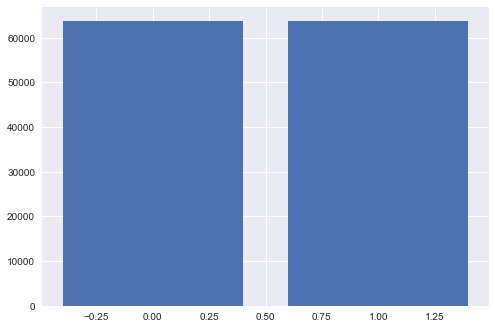

In [444]:
#Balancing the dataset
oversample = SMOTE()
X_bal, y_bal = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y_bal)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### <B> With Default hyperparameters _ RF,AB,HGB

* Train data prediction

In [ ]:
# initializing best models
rf_1 = RandomForestClassifier()
ab_1 = AdaBoostClassifier() 
hgb_1 = HistGradientBoostingClassifier()

In [ ]:
models = [rf_1,ab_1,hgb_1]

#fitting the model with default parameter
a1 = []
f1 = []
ar1 = []

for i in models:
    
    i.fit(X_bal,y_bal)
    y_pred = i.predict(X_bal)
    
    print(i)
    
    train1_acc = mat.accuracy_score(y_bal,y_pred)
    a1.append(train1_acc)
    print("Accuracy :",train1_acc)

    train1_f1 = mat.f1_score(y_bal,y_pred)
    f1.append(train1_f1)
    print("F1 Score:",train1_f1)

    train1_auroc = mat.roc_auc_score(y_bal,y_pred)
    ar1.append(train1_auroc)
    print("Auroc:",train1_auroc)

    print(classification_report(y_bal, y_pred))

    cm= mat.confusion_matrix(y_bal,y_pred)
    print(cm)
    #sns.heatmap(cm,annot=True)
    print("_"*100) # draw boundary line

#### <B>With Best Grid searched hyperparameters _ RF,AB,HGB

* Train data prediction

In [ ]:
# initializing models
rf_2 = RandomForestClassifier(class_weight = {0: 3.0, 1: 1},random_state=42)
ab_2 = AdaBoostClassifier(n_estimators = 165,random_state=42) 
hgb_2 = HistGradientBoostingClassifier(max_iter=200,learning_rate=0.1,max_depth = 12,l2_regularization=1.5,scoring='f1_micro',random_state=42)

In [ ]:
# Try other closer parameters too.Since we have done randomized search.

In [ ]:
models = [rf_2,ab_2,hgb_2]

#fitting the model with default parameter
a2 = []
f2 = []
ar2 = []

for i in models:
    
    i.fit(X_bal,y_bal)
    y_pred = i.predict(X_bal)
    print (i)
    
    train2_acc = mat.accuracy_score(y_bal,y_pred)
    a2.append(train2_acc)
    print("Accuracy :",train2_acc)

    train2_f1 = mat.f1_score(y_bal,y_pred)
    f2.append(train2_f1)
    print("F1 Score:",train2_f1)

    train2_auroc = mat.roc_auc_score(y_bal,y_pred)
    ar2.append(train2_auroc)
    print("Auroc:",train2_auroc)

    print(classification_report(y_bal, y_pred))

    cm= mat.confusion_matrix(y_bal,y_pred)
    print(cm)
    #sns.heatmap(cm,annot=True)
    print("_"*100) # draw boundary line

In [ ]:
#Results:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')


df1 = pd.DataFrame({"Accuracy":a1,"F1_Score":f1,"Auroc":ar1},index=["RF","AB","HGB"])
df2 = pd.DataFrame({"Accuracy":a2,"F1_Score":f2,"Auroc":ar2},index=["RF","AB","HGB"])


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on train_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Model Performance on train_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

In [ ]:
#___________________________________________________________________________________________________________________________

### <U>10.MODEL TESTING

* <B> Importing actual test data

In [409]:
test_data1 = pd.read_csv("Loans - Public Test Set (No Labels).csv")

* <b> Data Information

In [410]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44454 entries, 0 to 44453
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       44454 non-null  object 
 1   Customer ID                   44454 non-null  object 
 2   Loan Status                   44454 non-null  object 
 3   Current Loan Amount           44454 non-null  int64  
 4   Term                          44454 non-null  object 
 5   Credit Score                  44454 non-null  int64  
 6   Years in current job          42604 non-null  object 
 7   Home Ownership                44454 non-null  object 
 8   Annual Income                 44454 non-null  int64  
 9   Purpose                       44454 non-null  object 
 10  Monthly Debt                  44454 non-null  object 
 11  Years of Credit History       44454 non-null  float64
 12  Months since last delinquent  44452 non-null  float64
 13  N

In [411]:
# Find these analmolies by eyeballing through dataset in excel or make plots or trial/error

* <b> Data formatting

In [412]:
#removing punctuations
test_data1['Monthly Debt'] = (test_data1['Monthly Debt']).astype("str")

punctuation = ["$",",","-","/"]
for i in punctuation:
    test_data1['Monthly Debt'] = test_data1['Monthly Debt'].str.replace(i, '', regex=True)  

In [413]:
#Converting back to numeric after string character removal process
test_data1['Monthly Debt'] = pd.to_numeric(test_data1['Monthly Debt'])

In [414]:
test_data1['Monthly Debt'].dtypes

dtype('float64')

_______________

In [415]:
#Convert string column to numeric
test_data1['Maximum Open Credit'] = pd.to_numeric(test_data1['Maximum Open Credit'],errors='coerce')

___

In [416]:
#formatting the column with redundant data 
for i in range(len(test_data1['Home Ownership'])):
    if test_data1['Home Ownership'][i] == "HaveMortgage":
        test_data1['Home Ownership'][i] = "Home Mortgage" 

In [417]:
#binning
test_data1['Home Ownership'].value_counts()

Home Mortgage    21742
Rent             18820
Own Home          3892
Name: Home Ownership, dtype: int64

_________

In [418]:
#fixing redundant values
for i in range(len(test_data1['Purpose'])):
    if test_data1['Purpose'][i] == "other":
        test_data1['Purpose'][i] = "Other"

In [419]:
test_data1['Purpose'].value_counts()

Debt Consolidation      35315
Other                    3837
Home Improvements        2616
Business Loan             656
Buy a Car                 535
Medical Bills             496
Buy House                 290
Take a Trip               234
major_purchase            150
small_business            141
Educational Expenses       52
moving                     50
vacation                   41
wedding                    38
renewable_energy            3
Name: Purpose, dtype: int64

______________

* Binning

In [420]:
#binning
test_data1['Bankruptcies'] = np.where(test_data1['Bankruptcies']> 0, 1, 0)

In [421]:
test_data1['Tax Liens'] = np.where(test_data1['Tax Liens']> 0, 1, 0)

In [422]:
test_data1['Number of Credit Problems'] = np.where(test_data1['Number of Credit Problems']> 0, 1, 0)

* <b> Encoding

In [423]:
#label encode categorical_ordinal
test_data1['Years in current job'] = test_data1['Years in current job'].replace({"< 1 year":0,"1 year":1,
                                                                       "2 years":2,"3 years":3,
                                                                       "4 years":4,"5 years":5,
                                                                       "6 years":6,"7 years":7,
                                                                       "8 years":8,"9 years":9,
                                                                       "10+ years":10})

In [424]:
test_data1['Years in current job'].value_counts() 

10.0    13806
2.0      4175
0.0      3654
3.0      3485
5.0      3039
1.0      3029
4.0      2717
6.0      2502
7.0      2322
8.0      2147
9.0      1728
Name: Years in current job, dtype: int64

In [425]:
#Label encoding target class
test_data1["Loan Status"] = test_data1["Loan Status"].replace({"Fully Paid":0,"Charged Off":1})

________________

* <b> Treating anamolies

In [426]:
# Based on visualization of box plot , we will remove the extreme values from the following variables

#l = ['Annual Income','Maximum Open Credit','Current Loan Amount','Current Credit Balance',
#     'Monthly Debt','Number of Open Accounts','Years of Credit History','Months since last delinquent']
l = ['Current Loan Amount']

# Number of extreme values
for i in l:
    print(i,":",len(test_data1.loc[test_data1[i] >= max(raw_data[i])]))


Current Loan Amount : 0


In [427]:
max(raw_data["Current Loan Amount"])

99999999

In [428]:
# Finding and Treating Outliers which are at the extreme
for i in l:
    test_data1.loc[test_data1[i] == max(data1[i]),i] = np.nan

In [429]:
# Treating credit scores which are above 850 which ould be the max
for i in range(len(test_data1)):
    if  test_data1['Credit Score'][i] > 800:
        test_data1['Credit Score'][i] = (test_data1['Credit Score'][i])/10 

_____________________________

* <b>Dropping variable

In [430]:
#Dropping Id column which has no explanatory power over target
test_data1.drop(["Loan ID","Customer ID"],axis=1,inplace=True)

* <b> Fill Null

In [431]:
test_data1.isna().sum()

Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Years in current job            1850
Home Ownership                     0
Annual Income                      0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       2
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                3
Bankruptcies                       0
Tax Liens                          0
dtype: int64

In [432]:
test_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan Status,44454.0,0.283124,0.450521,0.0,0.0000,0.000,1.000,1.0
Current Loan Amount,44454.0,14000.404081,8265.362190,504.0,7819.0000,12060.500,19526.000,35875.0
Credit Score,44454.0,721.548702,27.562557,585.0,710.0000,731.000,741.000,751.0
Years in current job,42604.0,5.866843,3.644739,0.0,2.0000,6.000,10.000,10.0
Annual Income,44454.0,72628.160660,54480.824142,2979.0,44823.5000,61825.500,87233.500,5001000.0
Monthly Debt,44454.0,970.253524,634.030616,0.0,537.9125,851.305,1262.645,9835.3
Years of Credit History,44454.0,18.299915,7.046328,3.4,13.5000,17.000,21.700,61.5
Months since last delinquent,44452.0,15.613403,22.571131,0.0,0.0000,0.000,28.000,151.0
Number of Open Accounts,44454.0,11.158996,5.026281,0.0,8.0000,10.000,14.000,50.0
Number of Credit Problems,44454.0,0.132317,0.338838,0.0,0.0000,0.000,0.000,1.0


In [434]:
# fill missing with condition median because of skewed distribution and suspection of outliers

start = time.time()

l = ['Years in current job','Months since last delinquent','Maximum Open Credit']

loans0=test_data1[test_data1['Loan Status']==0]
loans1=test_data1[test_data1['Loan Status']==1]

for i in l:
    
    loans0[i].fillna(value=loans0[i].median(),inplace=True)
    loans1[i].fillna(value=loans1[i].median(),inplace=True)
    
end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")    


test_data2=pd.concat([loans0,loans1],axis=0)
test_data2.sort_index(inplace=True)  

timetaken: 0.002681875228881836 min


In [435]:
test_data2.isna().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [436]:
#one hot encoding for nominal
test_data2 = pd.get_dummies(test_data2,columns=['Term','Home Ownership','Purpose','Bankruptcies','Tax Liens','Number of Credit Problems'],drop_first=True)

_____________________________

* <b> Standardizing

In [438]:
# Scaling variables

# Using standard scalar
from sklearn.preprocessing import MinMaxScaler


continuous = ["Current Loan Amount","Credit Score","Annual Income","Number of Open Accounts","Current Credit Balance","Years in current job","Monthly Debt","Months since last delinquent","Years of Credit History","Maximum Open Credit"]
#scaler = StandardScaler()
scaler = MinMaxScaler()
test_data2[continuous]= scaler.fit_transform(test_data2[continuous])

In [439]:
# split target variable
X_test = test_data2.drop('Loan Status',axis=1)
y_test = test_data2['Loan Status']

In [440]:
X_test.head(2)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Bankruptcies_1,Tax Liens_1,Number of Credit Problems_1
0,0.636651,0.072289,1.0,0.013856,0.062424,0.182444,0.0,0.22,0.023758,0.000129,...,0,0,0,0,0,0,0,0,0,0
1,0.215487,0.668675,0.2,0.010582,0.067693,0.129088,0.0,0.28,0.006286,0.000116,...,0,0,0,0,0,0,0,0,0,0


In [485]:
print(X.shape)  # actual train data
print(X_bal.shape)  #balanced train data
print(X_test.shape)  # actual test data

(88910, 30)
(127474, 30)
(44454, 30)


In [446]:
len(X_bal.columns) == len(X_test.columns)  

True

In [447]:
X_bal.head(2)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Bankruptcies_1,Tax Liens_1,Number of Credit Problems_1
0,0.331817,0.861446,0.0,0.004892,0.033889,0.215247,0.056818,0.157895,0.003908,0.000114,...,0,0,0,0,0,0,0,0,0,0
1,0.693053,0.891566,1.0,0.008848,0.038889,0.345291,0.176136,0.184211,0.020634,0.001114,...,0,0,0,0,0,0,0,0,0,0


In [448]:
X_test.head(2)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Bankruptcies_1,Tax Liens_1,Number of Credit Problems_1
0,0.636651,0.072289,1.0,0.013856,0.062424,0.182444,0.0,0.22,0.023758,0.000129,...,0,0,0,0,0,0,0,0,0,0
1,0.215487,0.668675,0.2,0.010582,0.067693,0.129088,0.0,0.28,0.006286,0.000116,...,0,0,0,0,0,0,0,0,0,0


______________________________________________

In [459]:
X_bal.columns

Index(['Current Loan Amount', 'Credit Score', 'Years in current job',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit', 'Term_Short Term',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding',
       'Bankruptcies_1', 'Tax Liens_1', 'Number of Credit Problems_1'],
      dtype='object')

* <b> Predictions

In [449]:
predictions = pd.read_csv("Loans - Public Test Set (IDs and Labels).csv")

In [450]:
predictions.head()

,Loan ID,Loan Status
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,Fully Paid
1,01825d5d-429a-4de6-b3d4-8618364d2df2,Charged Off
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,Fully Paid
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,Charged Off
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,Charged Off


In [451]:
#Label encoding target class
predictions["Loan Status"] = predictions["Loan Status"].replace({"Fully Paid":0,"Charged Off":1})

In [452]:
y_test = predictions["Loan Status"] 

In [461]:
X_bal1 = X_bal.drop(["Years of Credit History","Maximum Open Credit"],axis=1)

In [464]:
X1 = X.drop(["Years of Credit History","Maximum Open Credit"],axis=1)

In [467]:
X_test1 = X_test.drop(["Years of Credit History","Maximum Open Credit"],axis=1)

In [486]:
X_test1.shape

(44454, 28)

In [487]:
X_bal1.shape

(127474, 28)

In [500]:
# Initializing models
rf_3 = RandomForestClassifier(class_weight = {0: 4, 1: 1})
ab_3 = AdaBoostClassifier(n_estimators = 300) 
hgb_3 = HistGradientBoostingClassifier(max_iter=300,learning_rate=0.01,max_depth = 14,l2_regularization=2,scoring='f1_micro')

In [501]:
# Try other closer parameters too.Since we have done randomized search.

In [502]:
models = [rf_3,ab_3,hgb_3]

#fitting the model with default parameter
a3 = []
f3 = []
ar3 = []

for i in models:
    
    i.fit(X_bal,y_bal)
    y_pred = i.predict(X_test)
    print (i)
    
    test1_acc = mat.accuracy_score(y_test,y_pred)
    a3.append(test1_acc)
    print("Accuracy :",test1_acc)

    test1_f1 = mat.f1_score(y_test,y_pred)
    f3.append(test1_f1)
    print("F1 Score:",test1_f1)

    test1_auroc = mat.roc_auc_score(y_test,y_pred)
    ar3.append(test1_auroc)
    print("Auroc:",test1_auroc)

    print(classification_report(y_test, y_pred))

    cm= mat.confusion_matrix(y_test,y_pred)
    print(cm)
    #sns.heatmap(cm,annot=True)
    print("_"*100) # draw boundary line

RandomForestClassifier(class_weight={0: 4, 1: 1})
Accuracy : 0.5554955684527827
F1 Score: 0.47961655957020954
Auroc: 0.6063225089207265
              precision    recall  f1-score   support

           0       0.82      0.49      0.61     31868
           1       0.36      0.72      0.48     12586

    accuracy                           0.56     44454
   macro avg       0.59      0.61      0.55     44454
weighted avg       0.69      0.56      0.57     44454

[[15588 16280]
 [ 3480  9106]]
____________________________________________________________________________________________________
AdaBoostClassifier(n_estimators=300)
Accuracy : 0.5448778512619786
F1 Score: 0.48623666835957335
Auroc: 0.6101662584763132
              precision    recall  f1-score   support

           0       0.83      0.46      0.59     31868
           1       0.36      0.76      0.49     12586

    accuracy                           0.54     44454
   macro avg       0.59      0.61      0.54     44454
weighted a

#### <b><U> RESULTS

* For the given test data,<b>RANDOM FOREST</b> model performs better in predicting the <b>AUROC Score</b> with a score of <b> 0.634 </b>